IRIS Dataset Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



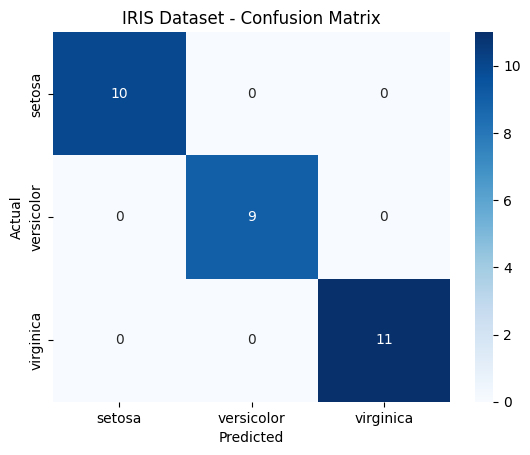

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset
iris_df = pd.read_csv('/content/iris (2).csv')

# Features and labels
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train, y_train)
y_pred_iris = knn_iris.predict(X_test)

# Metrics
print("IRIS Dataset Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_iris))
print("Classification Report:\n", classification_report(y_test, y_pred_iris))

# Labeled Confusion Matrix
cm = confusion_matrix(y_test, y_pred_iris, labels=knn_iris.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_iris.classes_, yticklabels=knn_iris.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('IRIS Dataset - Confusion Matrix')
plt.show()

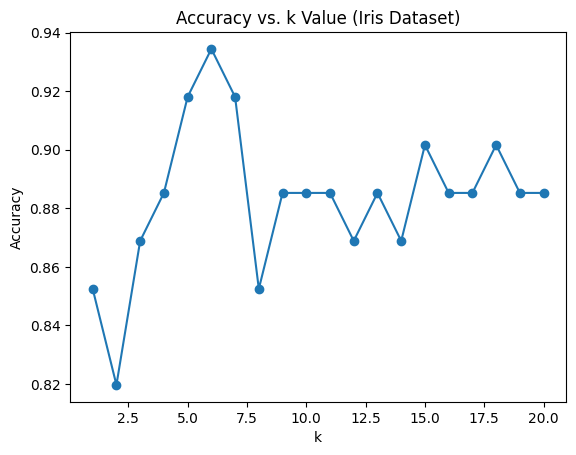

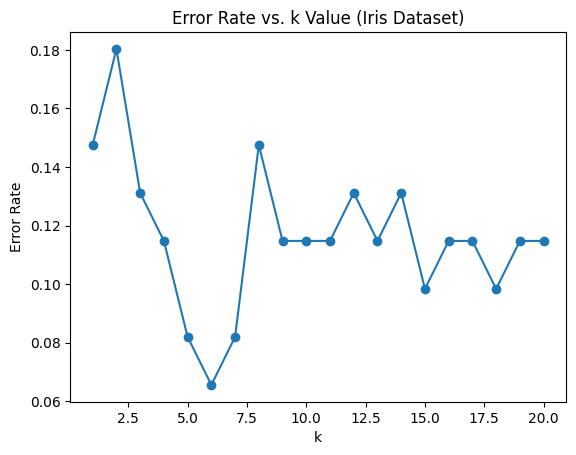

Optimal k for Iris Dataset: 6


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ... (your existing code for Iris dataset) ...

# Find optimal k
accuracy_scores = []
error_rates = []
k_range = range(1, 21)  # Explore k values from 1 to 20

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    error_rates.append(1 - accuracy)

# Plot Accuracy vs. k
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs. k Value (Iris Dataset)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Plot Error Rate vs. k
plt.plot(k_range, error_rates, marker='o')
plt.title('Error Rate vs. k Value (Iris Dataset)')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

# Find optimal k
optimal_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k for Iris Dataset: {optimal_k}")


Diabetes Dataset Results:
Accuracy: 0.6883116883116883
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



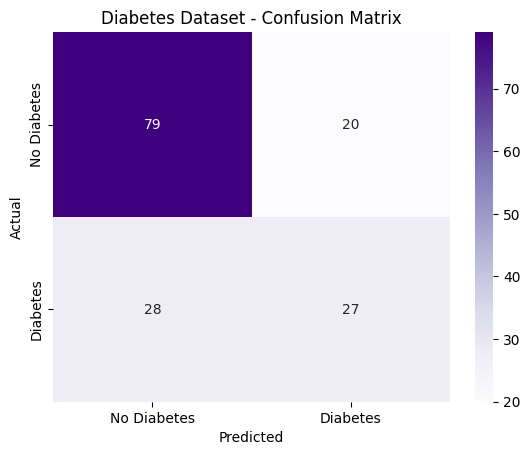

In [34]:
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
diabetes_df = pd.read_csv('/content/diabetes (1).csv')

# Features and labels
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN model
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train, y_train)
y_pred_diabetes = knn_diabetes.predict(X_test)

# Metrics
print("\nDiabetes Dataset Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_diabetes))
print("Classification Report:\n", classification_report(y_test, y_pred_diabetes))

# Labeled Confusion Matrix
cm = confusion_matrix(y_test, y_pred_diabetes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Diabetes Dataset - Confusion Matrix')
plt.show()


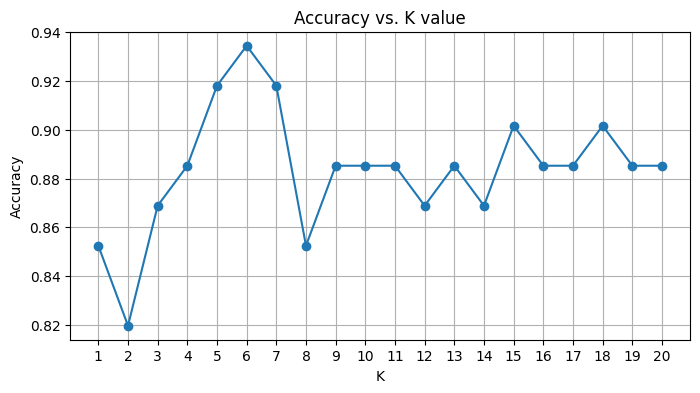

Best K Value: 6 with accuracy 0.9344


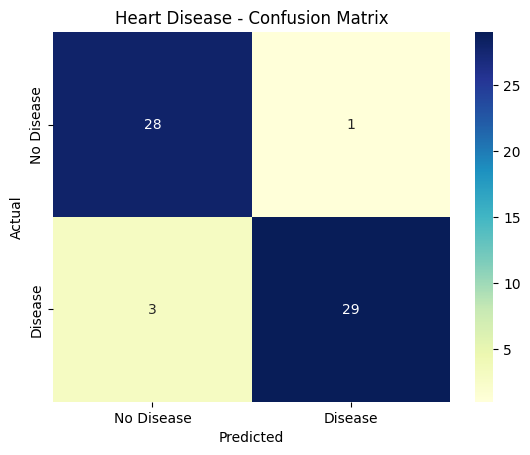

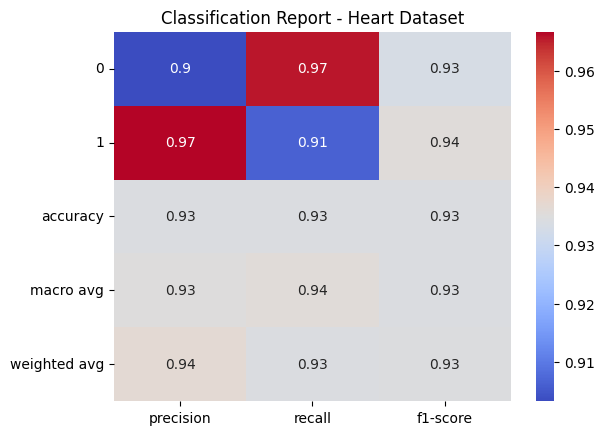

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
heart_df = pd.read_csv('/content/heart.csv')

# Features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k value
scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(8, 4))
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Best k
best_k = k_range[scores.index(max(scores))]
print(f"Best K Value: {best_k} with accuracy {max(scores):.4f}")

# Final model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heart Disease - Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report - Heart Dataset')
plt.show()